Plot saved as crank_power_vs_time_all_studies.png
Descriptive statistics saved as crank_power_descriptive_statistics.csv
    Study  Mean Crank Time (ms)  Total Crank Time (ms)  Mean Crank Power  \
0       1           8468.111111               152426.0          0.431616   
1       2           1967.081250               314733.0          0.182823   
2       3           6179.952381               259558.0          0.230308   
3       4           6366.148148               171886.0          0.371599   
4       5           8776.105263               166746.0          0.369394   
5       6           7033.766667               211013.0          0.293777   
6       7           2839.123596               252682.0          0.241977   
7       8           4867.229167               233627.0          0.239574   
8      11           2600.957447               122245.0          0.145660   
9      12           1869.771429                65442.0          0.112143   
10     13          13461.687500            

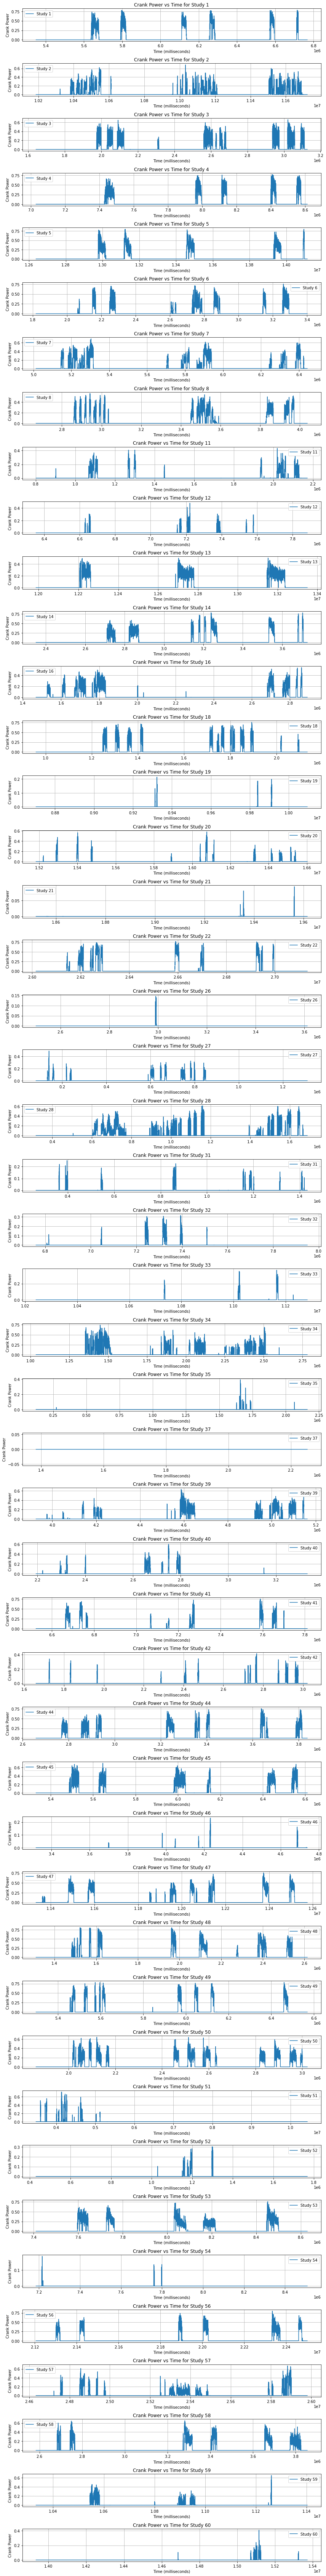

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing the CSV files
#directory = 

# Define the precise baseline power level
baseline_power = 0.00000

# List of study numbers to skip due to corrupted data. Decisions made in consultation with multiple authors. 
corrupted_studies = {9, 10, 17, 23, 25, 30, 43, 55}

# Function to combine files from the same study
def combine_study_files(study_files):
    combined_data = []
    for file in study_files:
        try:
            data = pd.read_csv(file)
            if not data.empty:
                combined_data.append(data)
        except pd.errors.EmptyDataError:
            print(f"Warning: {file} is empty and will be skipped.")
    
    if combined_data:
        return pd.concat(combined_data, ignore_index=True)
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no valid data was found

# Collect all CSV files and group by study number
study_files = {}
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        study_number = filename.split('_')[0]
        # Ensure the study_number can be converted to an integer
        if study_number.isdigit():
            study_number = int(study_number)
            if study_number not in corrupted_studies:  # Skip corrupted studies
                if study_number not in study_files:
                    study_files[study_number] = []
                study_files[study_number].append(os.path.join(directory, filename))

# Sort study numbers
sorted_studies = sorted(study_files.keys())

# DataFrame to store descriptive statistics for each study
stats_data = []

# Plot Crank Power against Time for each study
plt.figure(figsize=(12, len(sorted_studies) * 2))  # Adjust figure height based on number of studies

for i, study in enumerate(sorted_studies):
    combined_data = combine_study_files(study_files[study])
    
    if combined_data.empty:
        print(f"Warning: No valid data found for study {study}, skipping.")
        continue
    
    # Ensure the Time column is sorted
    combined_data = combined_data.sort_values(by='Time').reset_index(drop=True)
    
    total_crank_time = 0
    start_time = None
    active_periods = 0

    # Iterate through the rows to find the intervals as per the new criteria
    for idx, row in combined_data.iterrows():
        if row['CrankPower'] > baseline_power and start_time is None:
            # Start of an active period, set the start time to the previous time (0.00000)
            if idx > 0:
                start_time = combined_data['Time'].iloc[idx - 1]
            else:
                start_time = row['Time']
        elif row['CrankPower'] == baseline_power and start_time is not None:
            # End of an active period, calculate the time interval
            end_time = row['Time']
            total_crank_time += end_time - start_time
            start_time = None  # Reset start_time for the next interval
            active_periods += 1  # Count this as an active period

    if start_time is not None:
        # If the last time point is still part of an active period, add it
        end_time = combined_data['Time'].iloc[-1]
        total_crank_time += end_time - start_time
        active_periods += 1

    # Calculate the mean crank power during active crank times
    active_data = combined_data[combined_data['CrankPower'] > baseline_power]
    mean_crank_power = active_data['CrankPower'].mean() if not active_data.empty else 0
    max_crank_power = active_data['CrankPower'].max() if not active_data.empty else 0

    # Calculate Mean Crank Time based on the number of active periods
    mean_crank_time = total_crank_time / active_periods if active_periods > 0 else 0

    # Append the stats to the list, including cases with all zero crank power
    stats_data.append({
        'Study': study,
        'Mean Crank Time (ms)': mean_crank_time,
        'Total Crank Time (ms)': total_crank_time,
        'Mean Crank Power': mean_crank_power,
        'Max Crank Power': max_crank_power
    })

    # Plot the data regardless of crank power levels
    plt.subplot(len(sorted_studies), 1, i + 1)
    plt.plot(combined_data['Time'], combined_data['CrankPower'], label=f'Study {study}')
    plt.title(f'Crank Power vs Time for Study {study}')
    plt.xlabel('Time (milliseconds)')
    plt.ylabel('Crank Power')
    plt.grid(True)
    plt.legend()

# Save the plot as a PNG file
plt.tight_layout()
output_file = 'crank_power_vs_time_all_studies.png'
plt.savefig(output_file)
print(f"Plot saved as {output_file}")

# Create a DataFrame for the descriptive statistics
stats_df = pd.DataFrame(stats_data)

# Save the statistics as a CSV file
stats_output_file = 'crank_power_descriptive_statistics.csv'
stats_df.to_csv(stats_output_file, index=False)

# Display the statistics table
print(f"Descriptive statistics saved as {stats_output_file}")
print(stats_df)


Plot saved as vbat_vs_time_all_studies.png


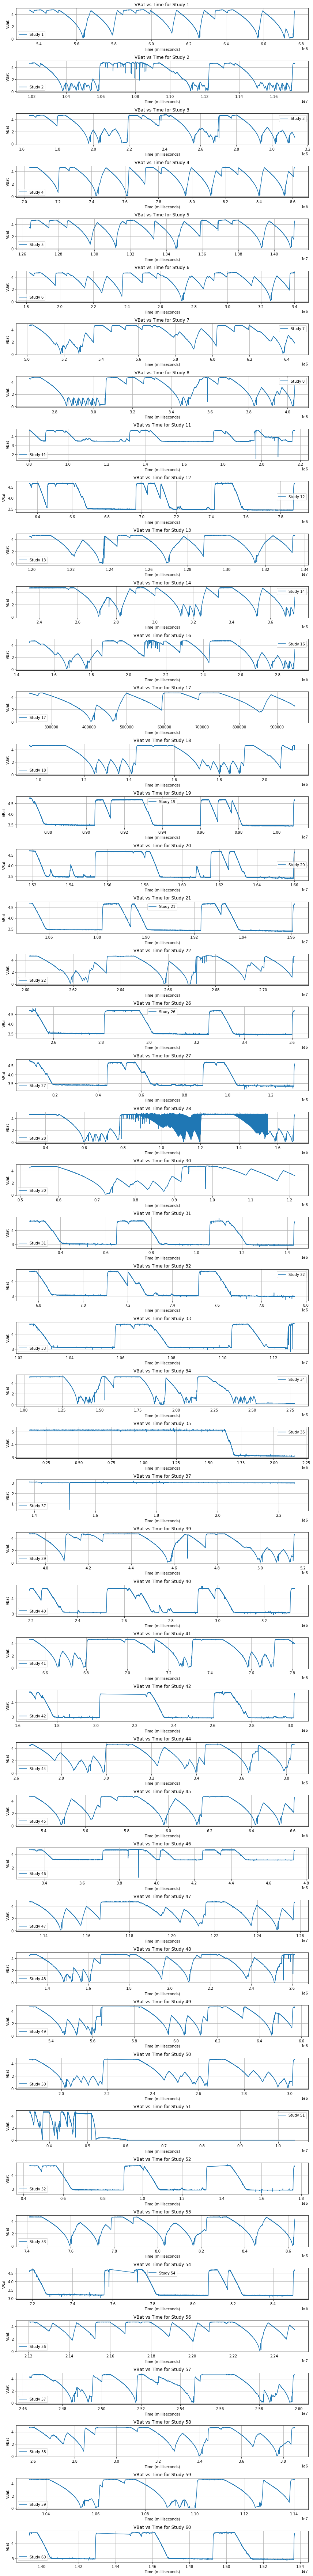

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing the CSV files
#directory = ''

# List of study numbers to skip due to corrupted data. Decisions made in consultation with multiple authors. 
corrupted_studies = {9, 10, 17, 23, 25, 30, 43, 55}

# Function to combine files from the same study
def combine_study_files(study_files):
    combined_data = []
    for file in study_files:
        try:
            data = pd.read_csv(file)
            if not data.empty:
                combined_data.append(data)
        except pd.errors.EmptyDataError:
            print(f"Warning: {file} is empty and will be skipped.")
    
    if combined_data:
        return pd.concat(combined_data, ignore_index=True)
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no valid data was found

# Collect all CSV files and group by study number
study_files = {}
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        study_number = filename.split('_')[0]
        # Ensure the study_number can be converted to an integer
        if study_number.isdigit():
            study_number = int(study_number)
            if study_number not in corrupted_studies:  # Skip corrupted studies
                if study_number not in study_files:
                    study_files[study_number] = []
                study_files[study_number].append(os.path.join(directory, filename))

# Sort study numbers
sorted_studies = sorted(study_files.keys())

# DataFrame to store descriptive statistics for each study (if needed)
stats_data = []

# Plot VBat against Time for each study
plt.figure(figsize=(12, len(sorted_studies) * 2))  # Adjust figure height based on number of studies

for i, study in enumerate(sorted_studies):
    combined_data = combine_study_files(study_files[study])
    
    if combined_data.empty:
        print(f"Warning: No valid data found for study {study}, skipping.")
        continue
    
    # Ensure the Time column is sorted
    combined_data = combined_data.sort_values(by='Time').reset_index(drop=True)
    
    # Plot VBat against Time
    plt.subplot(len(sorted_studies), 1, i + 1)
    plt.plot(combined_data['Time'], combined_data['VBat'], label=f'Study {study}')
    plt.title(f'VBat vs Time for Study {study}')
    plt.xlabel('Time (milliseconds)')
    plt.ylabel('VBat')
    plt.grid(True)
    plt.legend()

# Save the plot as a PNG file
plt.tight_layout()
output_file = 'vbat_vs_time_all_studies.png'
plt.savefig(output_file)
print(f"Plot saved as {output_file}")


In [18]:
import os
import pandas as pd

# Directory containing the CSV files
#directory = ''  

# Define the threshold to consider VBat close to 0
vbat_threshold = 1  # The threshold to consider VBat close to 0

# Define the time window to ignore further drops after a detected dip (3000 milliseconds)
ignore_duration = 3000  # in milliseconds

# Define the window size for the moving average (increase for more smoothing)
window_size = 20  # Increased window size for more aggressive smoothing

# List of study numbers to skip due to corrupted data
corrupted_studies = {9, 10, 17, 23, 25, 30, 43, 55}

# Function to combine files from the same study
def combine_study_files(study_files):
    combined_data = []
    for file in study_files:
        try:
            data = pd.read_csv(file)
            if not data.empty:
                combined_data.append(data)
        except pd.errors.EmptyDataError:
            print(f"Warning: {file} is empty and will be skipped.")
    
    if combined_data:
        return pd.concat(combined_data, ignore_index=True)
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no valid data was found

# Collect all CSV files and group by study number
study_files = {}
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        study_number = filename.split('_')[0]
        # Ensure the study_number can be converted to an integer
        if study_number.isdigit():
            study_number = int(study_number)
            if study_number not in corrupted_studies:  # Skip corrupted studies
                if study_number not in study_files:
                    study_files[study_number] = []
                study_files[study_number].append(os.path.join(directory, filename))

# Sort study numbers
sorted_studies = sorted(study_files.keys())

# Store the counts of times VBat falls below the threshold and returns back up
vbat_dip_counts = {}

for study in sorted_studies:
    combined_data = combine_study_files(study_files[study])
    
    if combined_data.empty:
        print(f"Warning: No valid data found for study {study}, skipping.")
        continue
    
    # Ensure the Time column is sorted
    combined_data = combined_data.sort_values(by='Time').reset_index(drop=True)
    
    # For study 51, filter the data to only include times <= 0.61
    #if study == 51:
     #   combined_data = combined_data[combined_data['Time'] <= 0.61]

    # Apply a more aggressive moving average to smooth the VBat data
    combined_data['VBat_Smoothed'] = combined_data['VBat'].rolling(window=window_size, min_periods=1).mean()

    # Initialise variables to track the dips
    in_dip = False
    dip_count = 0
    last_dip_time = -ignore_duration  # Initialise to a time far enough back
    
    for idx, row in combined_data.iterrows():
        vbat = row['VBat_Smoothed']
        current_time = row['Time']
        
        if vbat < vbat_threshold:
            # Check if this is a sudden drop that should be ignored
            if idx > 0:
                previous_vbat = combined_data['VBat_Smoothed'].iloc[idx - 1]
                if vbat > previous_vbat:  # Ignore if this is just a minor fluctuation
                    continue

            # If VBat is below the threshold and we are not already in a dip,
            # and it's been more than 3000 ms since the last counted dip
            if not in_dip and (current_time - last_dip_time) >= ignore_duration:
                in_dip = True
                last_dip_time = current_time  # Update the last dip time
        else:
            # If VBat has risen back above the threshold, end the current dip
            if in_dip:
                dip_count += 1
                in_dip = False
    
    # Store the count for this study
    vbat_dip_counts[study] = dip_count

# Print the counts of times VBat falls below the threshold and returns back up for each study
print("Number of times VBat falls below the threshold and returns back up:")
for study, count in vbat_dip_counts.items():
    print(f"Study {study}: {count} times")
# Note: The results of this counting was checked against the produced graphs for accuracy, some changes were made when clear from the plots.

Number of times VBat falls below the threshold and returns back up:
Study 1: 8 times
Study 2: 18 times
Study 3: 9 times
Study 4: 7 times
Study 5: 5 times
Study 6: 3 times
Study 7: 6 times
Study 8: 14 times
Study 11: 0 times
Study 12: 0 times
Study 13: 3 times
Study 14: 10 times
Study 16: 7 times
Study 17: 2 times
Study 18: 10 times
Study 19: 0 times
Study 20: 0 times
Study 21: 0 times
Study 22: 6 times
Study 26: 0 times
Study 27: 0 times
Study 28: 8 times
Study 30: 3 times
Study 31: 0 times
Study 32: 0 times
Study 33: 0 times
Study 34: 14 times
Study 35: 0 times
Study 37: 0 times
Study 39: 6 times
Study 40: 0 times
Study 41: 8 times
Study 42: 0 times
Study 44: 7 times
Study 45: 7 times
Study 46: 0 times
Study 47: 5 times
Study 48: 12 times
Study 49: 8 times
Study 50: 11 times
Study 51: 4 times
Study 52: 0 times
Study 53: 6 times
Study 54: 0 times
Study 56: 2 times
Study 57: 8 times
Study 58: 4 times
Study 59: 7 times
Study 60: 0 times


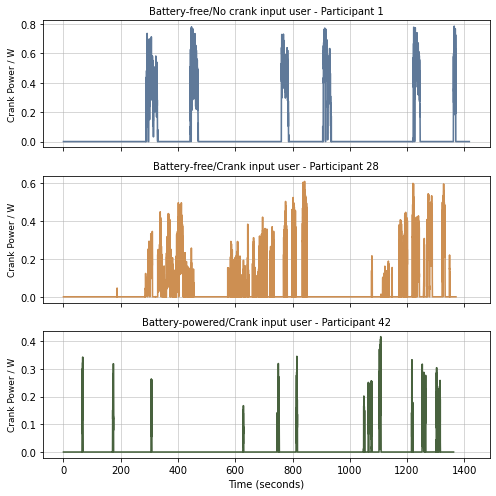

Saved combined figure as combined_crank_power_three_conditions.png


In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# CONFIG
# ------------------------------------------------------------
# directory = 
baseline_power = 0.00000

# Participants & colours (extracted from your boxplot)
participants_to_plot = {
    1: ("Battery-free/No crank input", "#5F7999"),   # blue
    28: ("Battery-free/Crank input", "#CD8F52"),     # orange
    42: ("Battery-powered/Crank input", "#48623E")   # green
}

# ------------------------------------------------------------
# Function to combine CSVs for each participant
# ------------------------------------------------------------
def combine_study_files(file_list):
    dfs = []
    for f in file_list:
        try:
            df = pd.read_csv(f)
            if not df.empty:
                dfs.append(df)
        except:
            print(f"Warning: skipping file: {f}")
    return pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

# ------------------------------------------------------------
# Collect CSV files by participant
# ------------------------------------------------------------
study_files = {}
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        study_num = filename.split("_")[0]
        if study_num.isdigit():
            study_num = int(study_num)
            if study_num in participants_to_plot:
                study_files.setdefault(study_num, [])
                study_files[study_num].append(os.path.join(directory, filename))

# ------------------------------------------------------------
# CREATE ONE COMPACT MULTIPLOT FIGURE
# ------------------------------------------------------------
fig, axes = plt.subplots(3, 1, figsize=(7, 7), sharex=True)

for ax, (participant, (label, colour)) in zip(axes, participants_to_plot.items()):

    df = combine_study_files(study_files[participant])

    df = df.sort_values(by="Time").reset_index(drop=True)
    df["Time"] = df["Time"] - df["Time"].iloc[0]
    df["Time_seconds"] = df["Time"] / 1000.0

    ax.plot(df["Time_seconds"], df["CrankPower"], color=colour, linewidth=1.6)

    ax.set_title(f"{label} user - Participant {participant}", fontsize=10)
    ax.set_ylabel("Crank Power / W", fontsize=9)
    ax.grid(True, linewidth=0.5)

axes[-1].set_xlabel("Time (seconds)", fontsize=10)

plt.tight_layout()
plt.savefig("combined_crank_power_three_conditions.png", dpi=300)
plt.show()

print("Saved combined figure as combined_crank_power_three_conditions.png")



ANALYSIS: active_periods
Battery-free/Crank input: Shapiro p = 0.0000
Battery-free/No crank input: Shapiro p = 0.0950
Battery-powered/Crank input: Shapiro p = 0.6885
Levene p = 0.2187

>>> NONPARAMETRIC: Kruskal–Wallis

Group medians and IQRs:
                             median    q1     q3  count
condition                                              
Battery-free/Crank input       57.5  36.0  90.50     14
Battery-free/No crank input    27.0  20.0  29.50     15
Battery-powered/Crank input    20.0  10.0  29.75     18

H = 18.827, p = 0.00008
Effect size ε² = 0.3824

Dunn post-hoc (Bonferroni-adjusted p-values):
                             Battery-free/Crank input  \
Battery-free/Crank input                     1.000000   
Battery-free/No crank input                  0.006171   
Battery-powered/Crank input                  0.000069   

                             Battery-free/No crank input  \
Battery-free/Crank input                        0.006171   
Battery-free/No crank input   

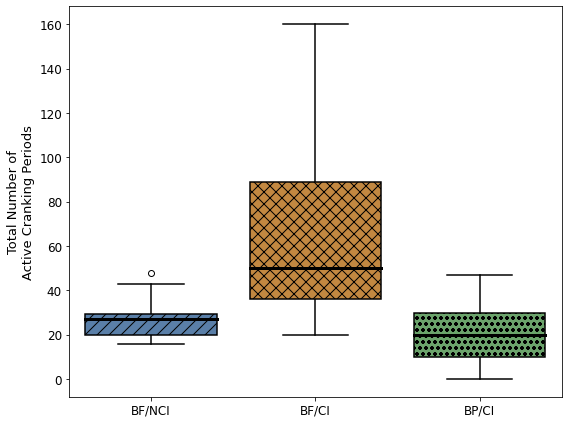

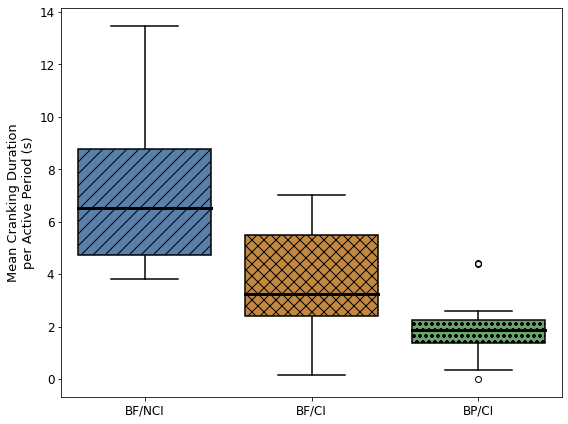

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import scikit_posthocs as sp
import itertools
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ============================================================
# 1. LOAD DATA
# ============================================================

#df = pd.read_csv()

df.rename(columns={"experiment_option": "condition"}, inplace=True)

# Clean NaNs
df_active = df.dropna(subset=["active_periods"]).copy()
df_mean   = df.dropna(subset=["mean_crank_time"]).copy()

# Convert mean crank time from ms → seconds for plotting only
df_mean["mean_crank_time_s"] = df_mean["mean_crank_time"] / 1000.0

conditions = [
    "Battery-free/No crank input",
    "Battery-free/Crank input",
    "Battery-powered/Crank input"
]

labels  = ["BF/NCI", "BF/CI", "BP/CI"]
colors  = ["#5A7FA8", "#C28841", "#6BA36B"]
hatches = ["//", "xx", "oo"]

# ============================================================
# 2. EFFECT SIZE HELPERS
# ============================================================

def cohens_d(x, y):
    """Cohen's d for independent samples."""
    nx, ny = len(x), len(y)
    vx, vy = x.var(ddof=1), y.var(ddof=1)
    pooled_sd = np.sqrt(((nx - 1)*vx + (ny - 1)*vy) / (nx + ny - 2))
    return (x.mean() - y.mean()) / pooled_sd


def rank_effect_size_r(u, nx, ny, n_total):
    """Rank-based effect size r from Mann–Whitney U."""
    mean_u = nx * ny / 2
    std_u  = np.sqrt(nx * ny * (nx + ny + 1) / 12)
    z = (u - mean_u) / std_u
    return z / np.sqrt(n_total)


# ============================================================
# 3. GROUP COMPARISON FUNCTION
# ============================================================

def run_group_comparison(df, value_col, group_col="condition"):
    groups = df.groupby(group_col)[value_col]
    k = groups.ngroups
    n = len(df)

    print(f"\n{'='*60}")
    print(f"ANALYSIS: {value_col}")
    print(f"{'='*60}")

    # ----------------------
    # Normality checks
    # ----------------------
    normal = True
    for gname, gdata in groups:
        if len(gdata) >= 3:
            p = stats.shapiro(gdata).pvalue
            print(f"{gname}: Shapiro p = {p:.4f}")
            if p < 0.05:
                normal = False

    levene_p = stats.levene(*[g for _, g in groups]).pvalue
    print(f"Levene p = {levene_p:.4f}")
    if levene_p < 0.05:
        normal = False

    # ========================================================
    # PARAMETRIC PIPELINE
    # ========================================================
    if normal:
        print("\n>>> PARAMETRIC: One-way ANOVA")

        # Summary stats
        print("\nGroup means ± SD:")
        print(groups.agg(["mean", "std", "count"]))

        model = ols(f"{value_col} ~ C({group_col})", data=df).fit()
        anova = sm.stats.anova_lm(model, typ=2)
        print("\nANOVA table:")
        print(anova)

        ss_between = anova["sum_sq"][0]
        ss_total   = anova["sum_sq"].sum()
        eta_sq = ss_between / ss_total
        print(f"\nEffect size η² = {eta_sq:.4f}")

        print("\nTukey HSD:")
        tukey = pairwise_tukeyhsd(df[value_col], df[group_col])
        print(tukey)

        print("\nPairwise Cohen's d:")
        group_data = {g: d for g, d in groups}
        for g1, g2 in itertools.combinations(group_data.keys(), 2):
            d = cohens_d(group_data[g1], group_data[g2])
            print(f"{g1} vs {g2}: d = {d:.3f}")

    # ========================================================
    # NONPARAMETRIC PIPELINE
    # ========================================================
    else:
        print("\n>>> NONPARAMETRIC: Kruskal–Wallis")

        # Medians + IQR
        print("\nGroup medians and IQRs:")
        med = groups.agg(
            median="median",
            q1=lambda x: x.quantile(0.25),
            q3=lambda x: x.quantile(0.75),
            count="count"
        )
        print(med)

        H, p_kw = stats.kruskal(*[g for _, g in groups])
        print(f"\nH = {H:.3f}, p = {p_kw:.5f}")

        epsilon_sq = (H - k + 1) / (n - k)
        print(f"Effect size ε² = {epsilon_sq:.4f}")

        if p_kw < 0.05:
            print("\nDunn post-hoc (Bonferroni-adjusted p-values):")
            dunn = sp.posthoc_dunn(
                df,
                val_col=value_col,
                group_col=group_col,
                p_adjust="bonferroni"
            )
            print(dunn)

            print("\nPairwise effect sizes (r):")
            group_data = {g: d for g, d in groups}
            for g1, g2 in itertools.combinations(group_data.keys(), 2):
                x = group_data[g1]
                y = group_data[g2]

                u, _ = stats.mannwhitneyu(x, y, alternative="two-sided")
                r = rank_effect_size_r(u, len(x), len(y), n)
                print(f"{g1} vs {g2}: r = {r:.3f}")


# ============================================================
# 4. RUN ANALYSES
# ============================================================

run_group_comparison(df_active, "active_periods")
run_group_comparison(df_mean,   "mean_crank_time")  # ms


# ============================================================
# 5. STYLED BOXPLOT FUNCTION
# ============================================================

def styled_boxplot(ax, data_list, labels, colors, hatches, ylabel):
    bp = ax.boxplot(
        data_list,
        patch_artist=True,
        labels=labels,
        widths=0.8,
        medianprops=dict(color="black", linewidth=3),
        whiskerprops=dict(color="black", linewidth=1.5),
        capprops=dict(color="black", linewidth=1.5)
    )

    for patch, color, hatch in zip(bp["boxes"], colors, hatches):
        patch.set_facecolor(color)
        patch.set_edgecolor("black")
        patch.set_linewidth(1.5)
        patch.set_hatch(hatch)

    ax.set_ylabel(ylabel, fontsize=13)
    ax.tick_params(axis="both", labelsize=12)


# ============================================================
# 6. PLOTS
# ============================================================

# --- Active cranking periods ---
fig, ax = plt.subplots(figsize=(8, 6))
df_active_plot = df_active[df_active["active_periods"] < 1000]

data_active = [
    df_active_plot[df_active_plot["condition"] == c]["active_periods"]
    for c in conditions
]

styled_boxplot(
    ax,
    data_active,
    labels,
    colors,
    hatches,
    "Total Number of\nActive Cranking Periods"
)

plt.tight_layout()
plt.savefig("active.png", dpi=300)
plt.show()


# --- Mean crank duration ---
fig, ax = plt.subplots(figsize=(8, 6))

data_mean = [
    df_mean[df_mean["condition"] == c]["mean_crank_time_s"]
    for c in conditions
]

styled_boxplot(
    ax,
    data_mean,
    labels,
    colors,
    hatches,
    "Mean Cranking Duration\nper Active Period (s)"
)

plt.tight_layout()
plt.savefig("mean_crank.png", dpi=300)
plt.show()

